# Introduction

In this notebook I will show you how to write a python program that predicts the price of stocks using a machine learning technique called Long Short-Term Memory (LSTM). This program is really simple and I doubt any major profit will be made from this program, but it’s slightly better than guessing! Remember the stock price can be affected by many different things.


We will be solve the following question:
1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks'?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

# Contents

1. Inroduction
2. Importing libraries
3. Reading datasets
4. Building Models
5. Conclusion

# Importing libraries

In [126]:
# here we are importing important libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM


# Reading dataset

**1. What was the change in price of the stock overtime?**

In [127]:
# Here we are making tech list which we will use for this analysis
Tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
# now we are setting end and start time for grabing data
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)
# now we are using for loop for grabing yahoo data and setting it in form of dataframe
#  Using globals() is a sloppy way of setting the DataFrame names, but its simple
for stock in Tech_list:
    globals()[stock] = web.DataReader(stock,"yahoo",start,end)

In [128]:
# here we are making list of our company
Company_list = [AAPL,GOOG,MSFT,AMZN]
company_name = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
for company, comp_name in zip(Company_list,company_name):
    company["company_name"] = comp_name
    
df = pd.concat(Company_list,axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-08-21,3314.399902,3275.389893,3295.000000,3284.719971,3575900.0,3284.719971,AMZN
2020-08-24,3380.320068,3257.560059,3310.149902,3307.459961,4666300.0,3307.459961,AMZN
2020-08-25,3357.399902,3267.000000,3294.989990,3346.489990,3992800.0,3346.489990,AMZN
2020-08-26,3451.739990,3344.570068,3351.110107,3441.850098,6508700.0,3441.850098,AMZN
2020-08-27,3453.000000,3378.000000,3450.050049,3400.000000,4264800.0,3400.000000,AMZN
2020-08-28,3433.370117,3386.500000,3423.000000,3401.800049,2897000.0,3401.800049,AMZN
2020-08-31,3495.000000,3405.000000,3408.989990,3450.959961,4185900.0,3450.959961,AMZN
2020-09-01,3513.870117,3467.000000,3489.580078,3499.120117,3476400.0,3499.120117,AMZN
2020-09-02,3552.250000,3486.689941,3547.000000,3531.449951,3914500.0,3531.449951,AMZN


In [129]:
# here we are summarize stats 
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,77.721618,75.820814,76.692265,76.884228,1.461004e+08,76.542942
std,18.175481,17.598394,17.966844,17.918686,6.756417e+07,18.059127
min,51.744999,51.055000,51.607498,51.424999,4.661760e+07,50.919777
25%,65.363750,63.958752,64.323750,64.857498,1.010828e+08,64.415604
50%,74.750000,71.625000,72.489998,73.230003,1.281860e+08,72.900864
75%,82.450001,80.822502,81.174999,82.337502,1.695018e+08,82.079098
max,137.979996,130.529999,137.589996,134.179993,4.184740e+08,134.179993


In [130]:
# here we are printing information of our dataset
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-09-03 to 2020-09-03
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          255 non-null    float64
 1   Low           255 non-null    float64
 2   Open          255 non-null    float64
 3   Close         255 non-null    float64
 4   Volume        255 non-null    float64
 5   Adj Close     255 non-null    float64
 6   company_name  255 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.9+ KB


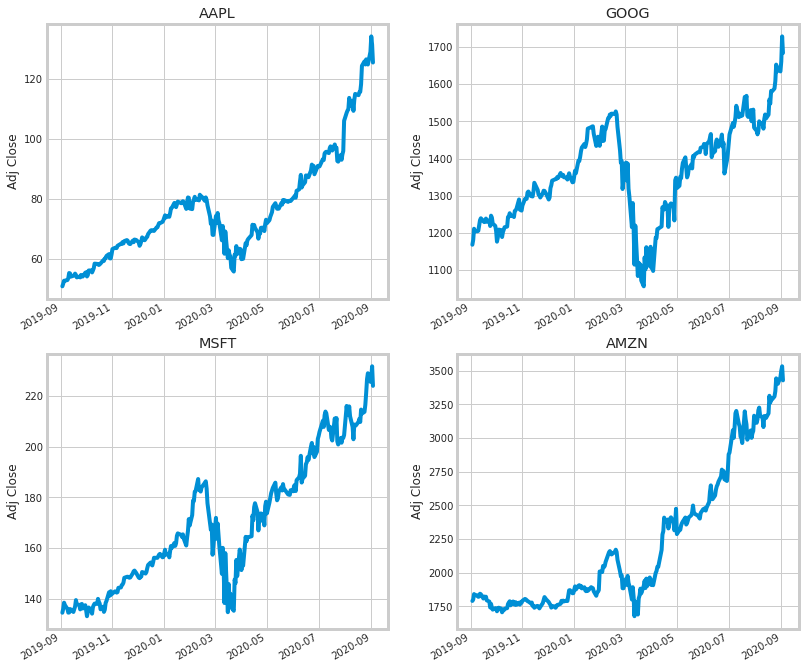

In [131]:
# here we are visualising of closing price
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

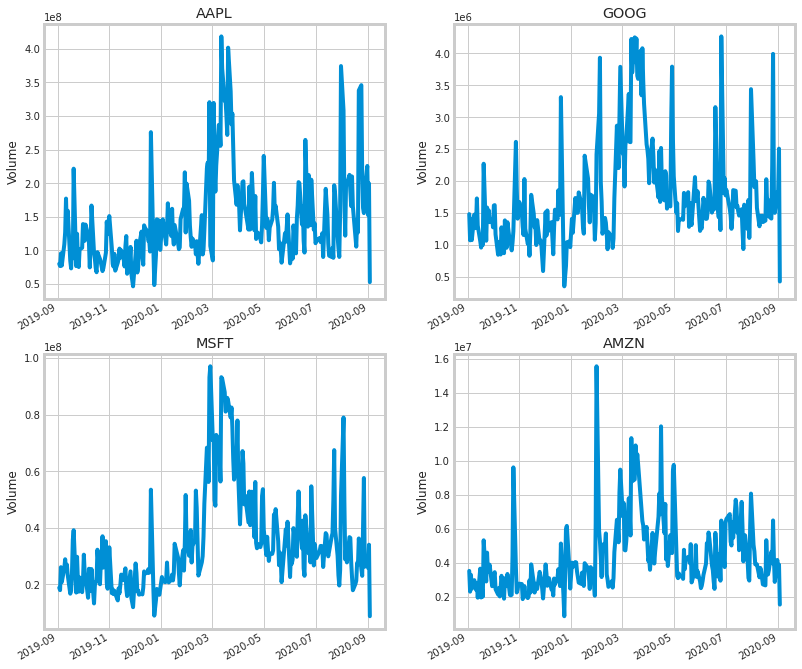

In [132]:
# here we are visualising total volume of stock being trade each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2,i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{Tech_list[i - 1]}")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

**2. What was the moving average of the various stocks?**

There are three important moving averages that can be applied to your charts that will help you trade better. They are the 10 moving average, the 20 moving average and the 50 moving average.
The 20 moving average (10MA) is the short-term outlook.
The 50 moving average (20MA) is the medium term outlook.
The 200 moving average (50MA) is the trend bias.


In [133]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in Company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [134]:
# here we are printing columns of google company
print(GOOG.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


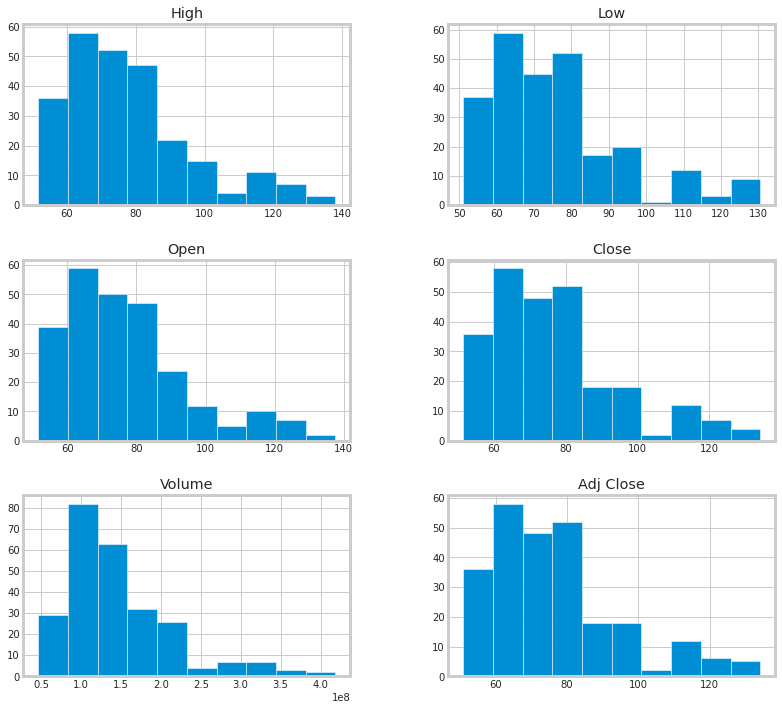

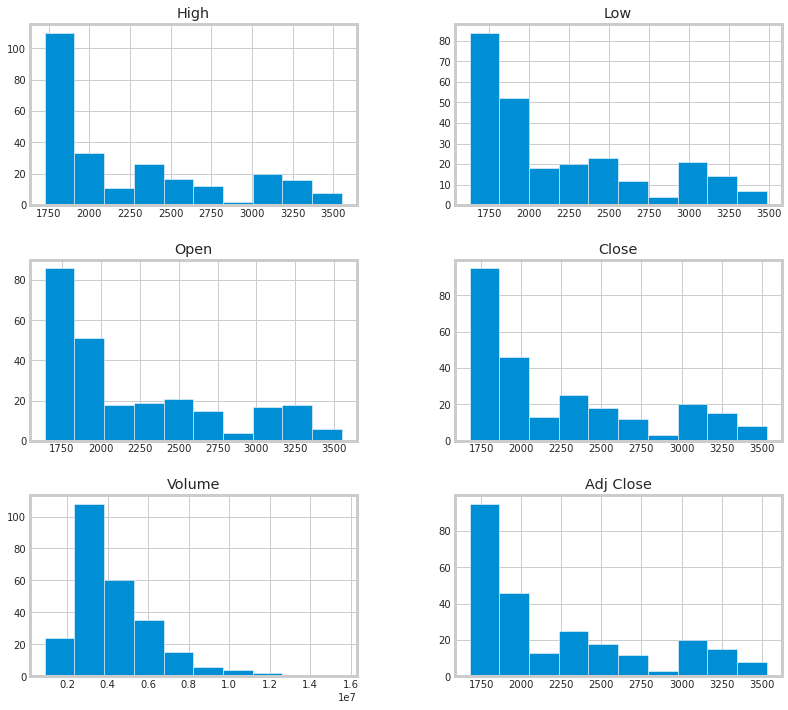

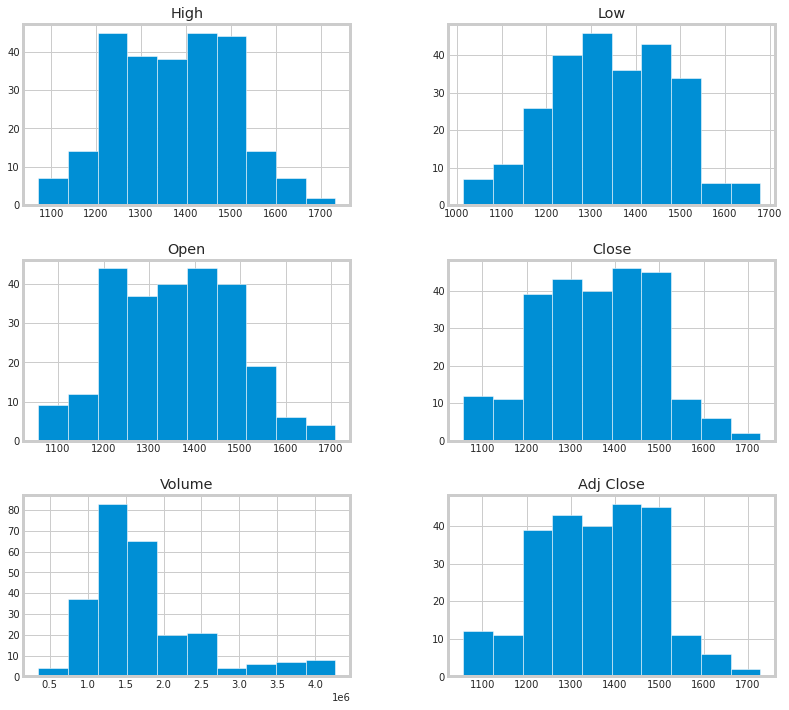

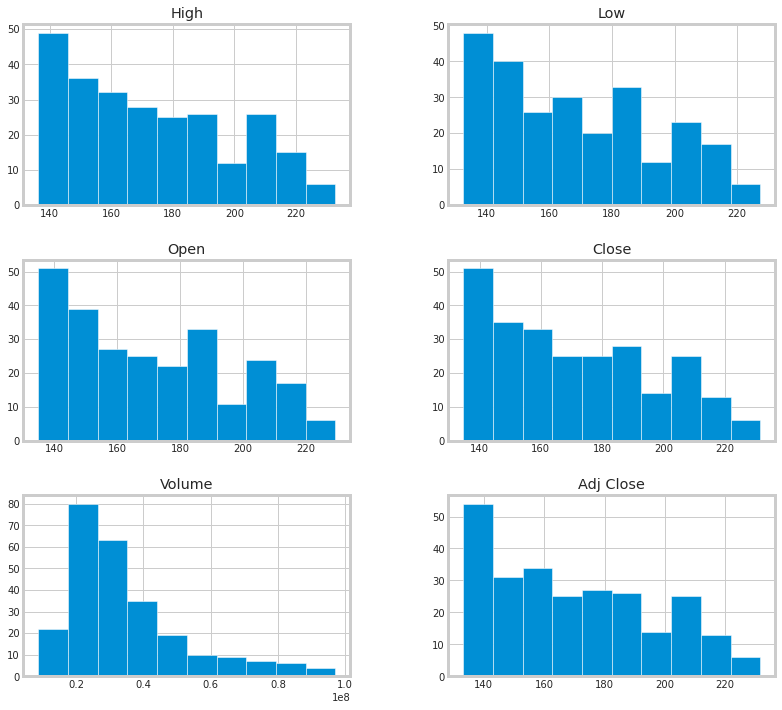

In [135]:
# here we are visualising the additional moving averages
df.groupby("company_name").hist(figsize=(12, 12));

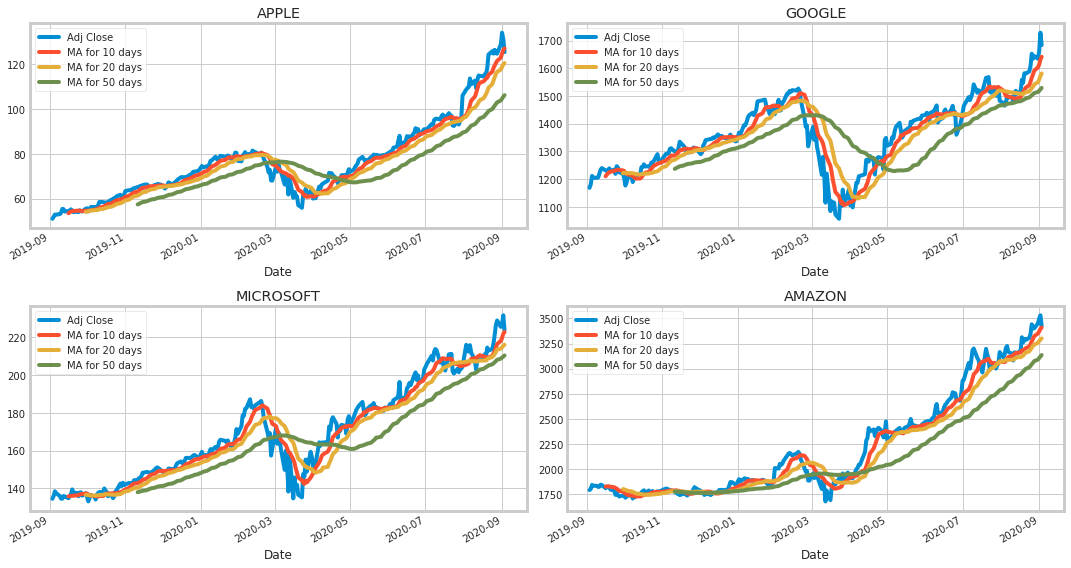

In [136]:
# here we are visualising three important moving averages of all the company
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

**3. What was the daily return of the stock on average?**

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

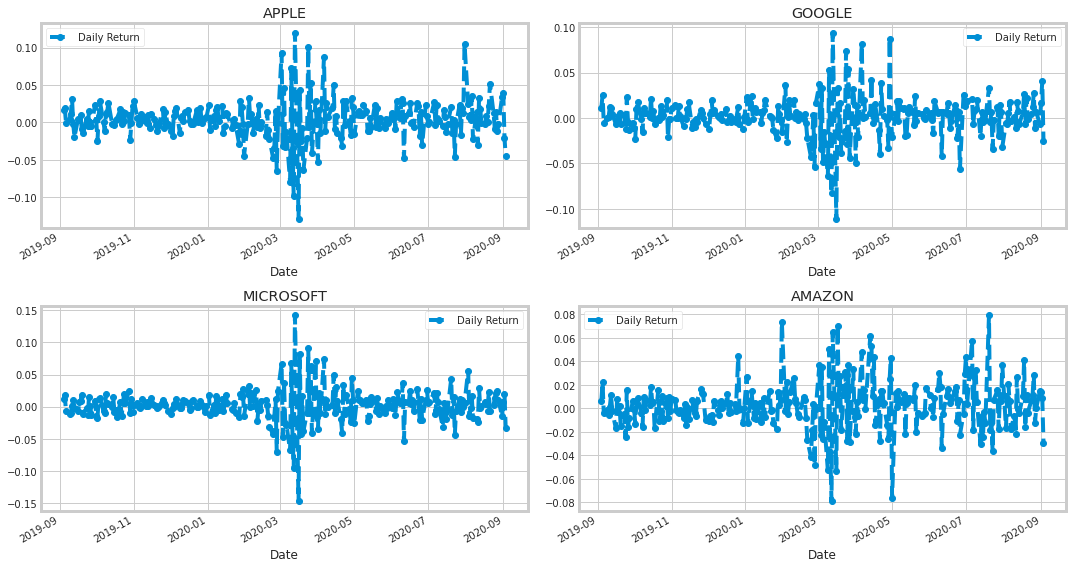

In [137]:
# We'll use pct_change to find the percent change for each day
for company in Company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

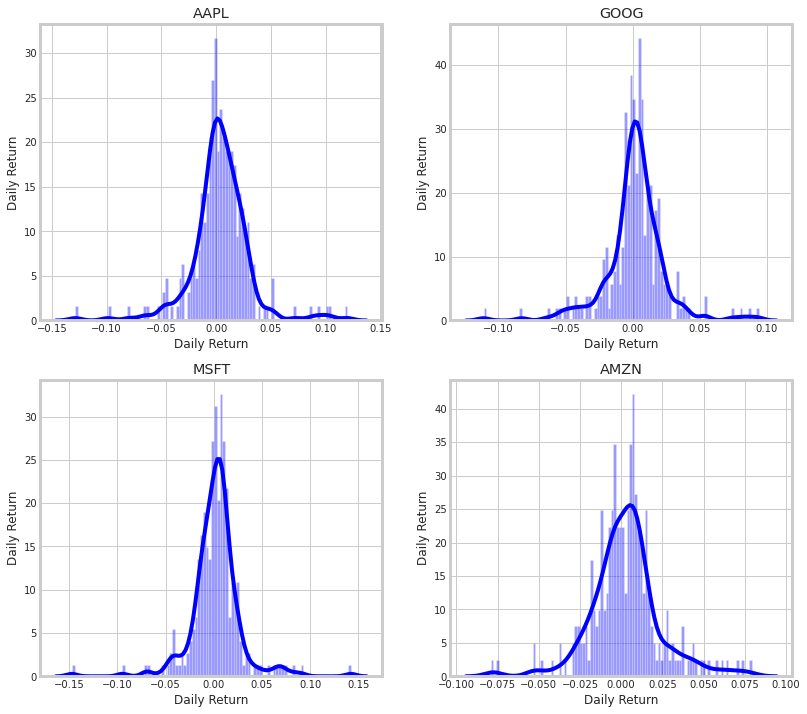

In [167]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(Company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='blue')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')


**4. What was the correlation between different stocks closing prices?**

In [139]:
# here we are Grabing all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(Tech_list, 'yahoo', start, end)['Adj Close']
# here we are printing first five line
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-03,50.919777,1168.390015,134.508682,1789.839966
2019-09-04,51.783714,1181.410034,136.080795,1800.619995
2019-09-05,52.796162,1211.380005,138.473541,1840.719971
2019-09-06,52.791210,1204.930054,137.534241,1833.510010
2019-09-09,53.016479,1204.410034,135.972031,1831.349976


In [140]:
# here we are Making a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-09-03,NaN,NaN,NaN,NaN
2019-09-04,0.016967,0.011144,0.011688,0.006023
2019-09-05,0.019551,0.025368,0.017583,0.022270
2019-09-06,-0.000094,-0.005324,-0.006783,-0.003917
2019-09-09,0.004267,-0.000432,-0.011359,-0.001178


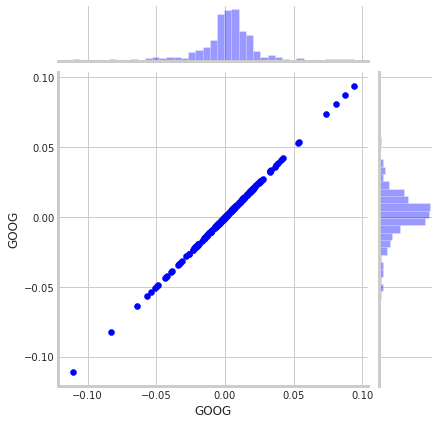

In [141]:
# here we are comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color = "blue")

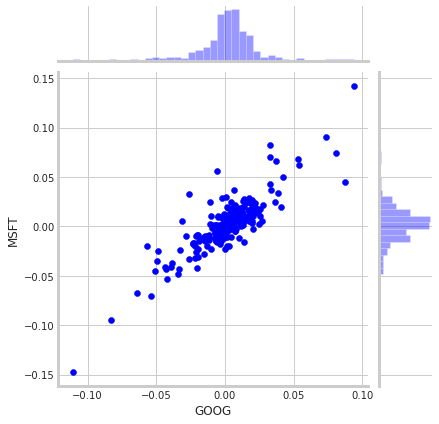

In [142]:
# here We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color = "blue")

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

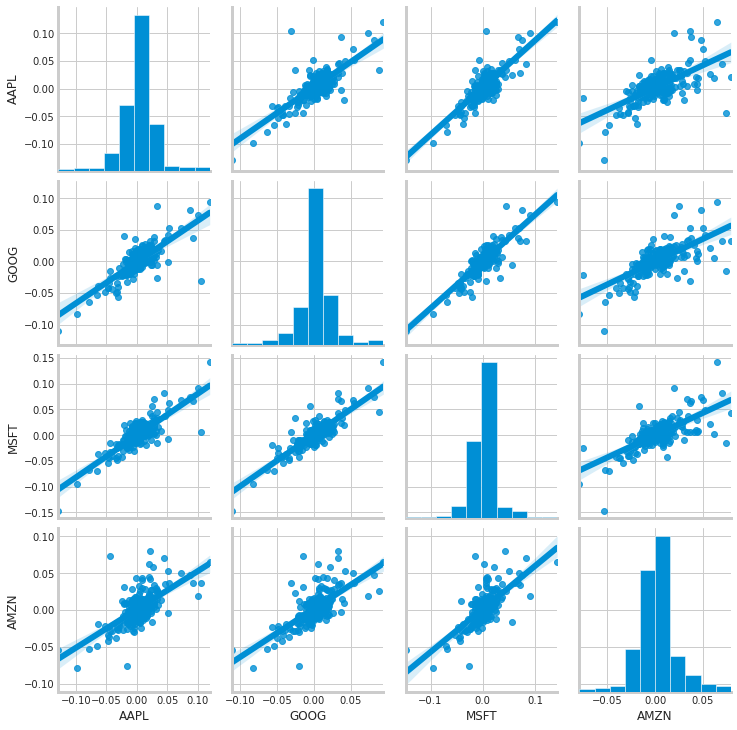

In [169]:
# Here we are simply calling pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons
sns.pairplot(tech_rets, kind='reg')

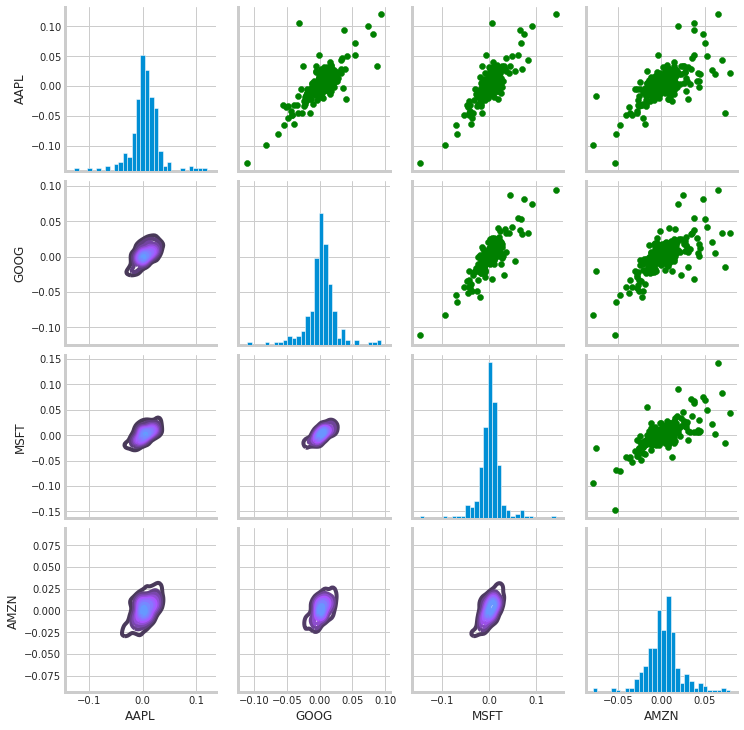

In [170]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='green')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

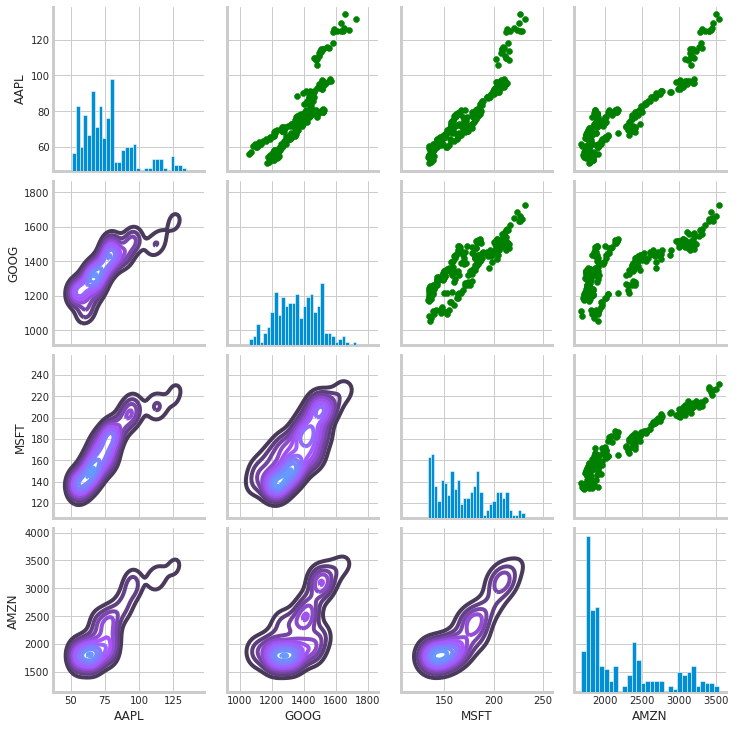

In [171]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='green')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

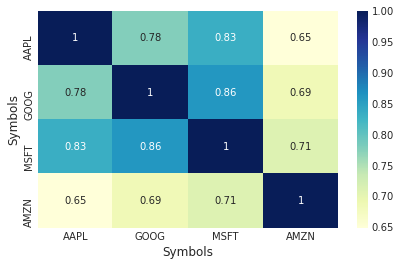

In [172]:
# Here we are using seabron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap="YlGnBu")

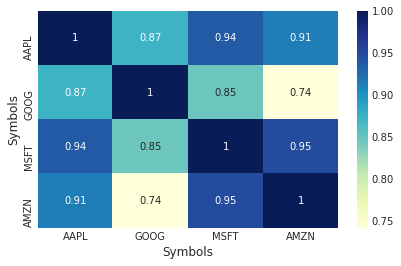

In [173]:
sns.heatmap(closing_df.corr(), annot=True, cmap="YlGnBu")

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

**5. How much value do we put at risk by investing in a particular stock?**

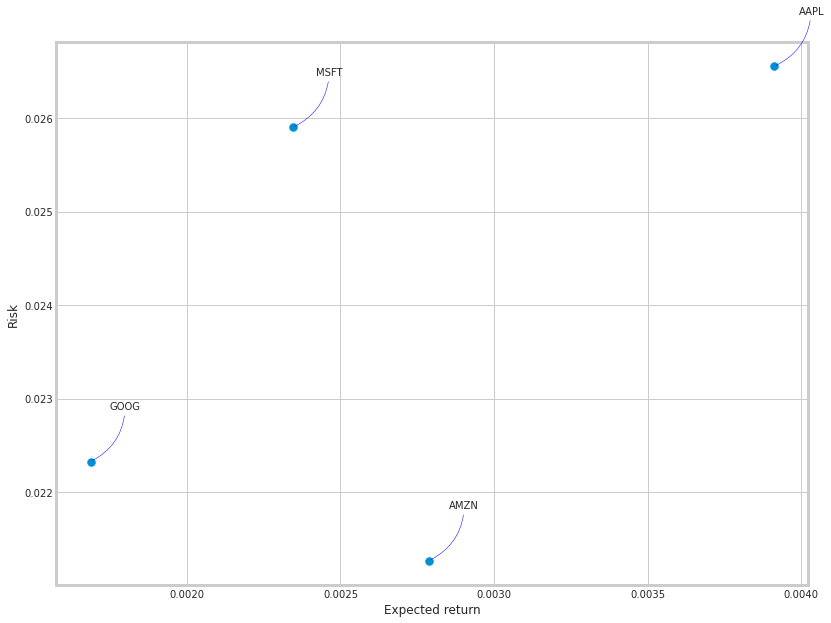

In [148]:
# Here e are defining a new DataFrame as a cleaned version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# Building Models

**6. Predicting the closing price stock price of APPLE inc:**

In [149]:
# here we are Getting the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# printing the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732142,14.607142,14.621428,14.686786,302220800.0,12.691425
2012-01-04,14.810000,14.617143,14.642858,14.765715,260022000.0,12.759631
2012-01-05,14.948215,14.738214,14.819643,14.929643,271269600.0,12.901293
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,13.036158
2012-01-09,15.276786,15.048214,15.196428,15.061786,394024400.0,13.015480
...,...,...,...,...,...,...
2020-08-28,126.442497,124.577499,126.012497,124.807503,187630000.0,124.807503
2020-08-31,131.000000,126.000000,127.580002,129.039993,225702700.0,129.039993
2020-09-01,134.800003,130.529999,132.759995,134.179993,152470100.0,134.179993


In [150]:
# here we are printing shape of data
df.shape

(2183, 6)

There are 2183 rows and 6 columns

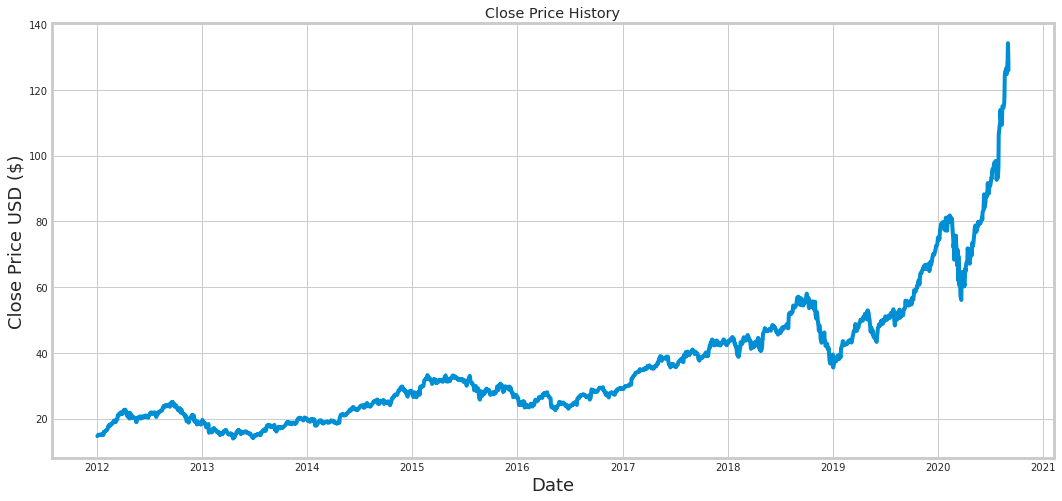

In [151]:
# here we are Visualising the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

Create a new data frame with only the closing price and convert it to an array.
Then create a variable to store the length of the training data set. I want the training data set to contain about 80% of the data.

In [152]:
#Creating a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

1747

Now scale the data set to be values between 0 and 1 inclusive, I do this because it is generally good practice to scale your data before giving it to the neural network.

In [153]:
# here we are Scaling the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0061488 ],
       [0.00680527],
       [0.00816869],
       ...,
       [1.        ],
       [0.97687814],
       [0.93188202]])

In [154]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00884299, 0.01095496, 0.00887566,
       0.01667305, 0.01607005, 0.01685722, 0.01855928, 0.01959001,
       0.01950387, 0.01918604, 0.02054056, 0.02181487, 0.02325851,
       0.0255903 , 0.03048855, 0.03056281, 0.03328967, 0.03532738,
       0.03182524, 0.03317382, 0.03314709, 0.03692846, 0.0363908 ,
       0.03738589, 0.0391741 , 0.0401692 , 0.04303567, 0.04512389,
       0.04572687, 0.04593778, 0.04236733, 0.04150589, 0.04163362,
       0.04499021, 0.04593482, 0.04796361, 0.05274602, 0.05912652,
       0.0579324 , 0.05793537, 0.06254846, 0.06399208, 0.06296431,
       0.06202567, 0.06104839, 0.06429507, 0.06652291, 0.06745562])]
[0.06515055661523342]

[array([0.0061488 , 0.00680527, 0.00816869, 0.00946678, 0.00926776,
       0.00971629, 0.00951133, 0.00916676, 0.00869744, 0.01014998,
       0.01145994, 0.01105596, 0.00

In [155]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [156]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [157]:
#now we are Building the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [158]:
# here we are Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [159]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1687/1687 [==============================] - 48s 29ms/step - loss: 2.4074e-04


In [160]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [161]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [162]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [163]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [164]:
# here we are calculaing the value of RMSE 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

3.3119839013267662

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


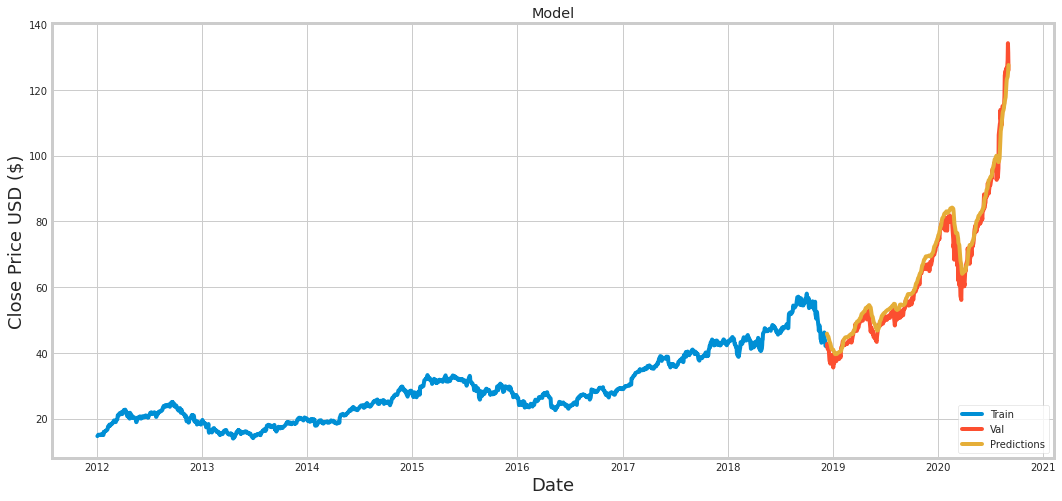

In [165]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [166]:
print(valid)

                 Close  Predictions
Date                               
2018-12-12   42.275002    45.852188
2018-12-13   42.737499    45.508003
2018-12-14   41.369999    45.266945
2018-12-17   40.985001    44.958637
2018-12-18   41.517502    44.606354
...                ...          ...
2020-08-28  124.807503   123.218452
2020-08-31  129.039993   123.972687
2020-09-01  134.179993   124.918785
2020-09-02  131.399994   126.340744
2020-09-03  125.989998   127.540886

[436 rows x 2 columns]


# Conclusion

Thanks for reading. I hope you like my analysing and visualization and found it to be helpful. If you have any questions or suggestions, feel free to write them down in the comment section